[Home](../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [2]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


(Optional) Load a second model if you want to do comparative testing

In [20]:
filename = 'my_saved_model_v1.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [3]:
x_col = 'budget'
testing_data = pd.read_csv('testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['gross'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

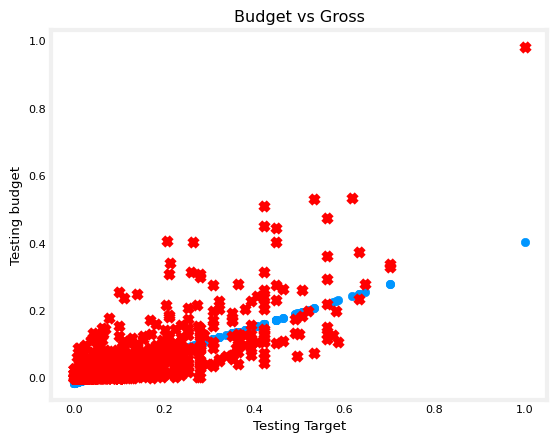

In [4]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("Budget vs Gross")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [5]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.5107130911650527


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [6]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

         DoB       DoT  Predicted result      Loss
0   0.146154  0.095385          0.215465 -0.124615
1   0.534615  0.630769          0.455053  0.170769
2   0.538462  0.867692          0.457425  0.407692
3   0.669231  0.230769          0.538078 -0.309231
4   0.607692  0.732308          0.500124  0.232308
5   0.146154  0.200000          0.215465 -0.020000
6   0.211538  0.138462          0.255791 -0.121538
7   0.653846  0.344615          0.528590 -0.185385
8   0.657692  0.803077          0.530962  0.273077
9   0.753846  0.796923          0.590266  0.206923
10  0.576923  0.615385          0.481147  0.135385
11  0.615385  0.800000          0.504868  0.300000
12  0.288462  0.255385          0.303235 -0.044615
13  0.176923  0.375385          0.234442  0.145385
14  0.565385  0.504615          0.474030  0.034615
15  0.623077  0.646154          0.509612  0.136154
16  0.573077  0.452308          0.478774 -0.027692
17  0.307692  0.387692          0.315095  0.067692
18  0.580769  0.415385         

You may want to do some manual predictions to understand your model.

In [25]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[-66.30802998]
[-58.81285279]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [26]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: -67.14082744272244
Coefficient: [8.32797465]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [2]:
filename = 'my_saved_model_v1.sav'
model_C = pickle.load(open(filename, 'rb'))

In [8]:
# Optional
filename = 'my_saved_model_v2.sav'
model_D = pickle.load(open(filename, 'rb'))

In [3]:
mx_col = ['budget','score','release_quarter', 'director_avg_gross','star_avg_score','company_avg_gross', 'votes', 'rating']
testing_data = pd.read_csv('testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['gross'])

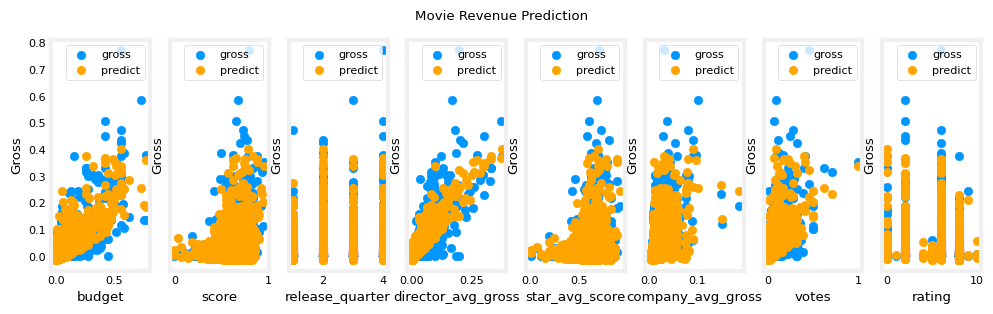

In [4]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'gross')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Gross"); ax[i].legend();
fig.suptitle("Movie Revenue Prediction")
plt.show()

In [5]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.7739964877090335


In [ ]:
#manual calculation of cost
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

ValueError: X has 3 features, but LinearRegression is expecting 6 features as input.

In [9]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

        budget     score  release_quarter  star_popularity  \
0     0.100320  0.527027              4.0         0.300963   
1     0.100320  0.432432              1.0         0.019323   
2     0.100320  0.581081              3.0         0.630340   
3     0.036509  0.675676              3.0         0.119434   
4     0.047745  0.581081              3.0         0.226050   
...        ...       ...              ...              ...   
1875  0.084262  0.878378              2.0         0.816300   
1876  0.036509  0.432432              3.0         0.019155   
1877  0.100320  0.729730              2.0         0.002532   
1878  0.014037  0.608108              2.0         1.293298   
1879  0.289320  0.527027              2.0         0.694829   

      director_popularity     votes  budget_revenue  budget_per_vote  \
0                0.000491  0.007069        0.000447         0.099616   
1                0.003196  0.001944        0.000007         0.100125   
2                0.000220  0.009152    

In [7]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -0.003197831511475381
Coefficient: [ 7.91536347e-01  3.39115839e-03  1.74378274e-05 -6.45553694e-04
 -8.74407509e-04 -1.02531161e-01  1.23794600e+00 -7.86472320e-01]


#### Step 10

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.